# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Bisnis Understanding**

Perusahaan otomotif ini berencana memasuki pasar baru dengan memanfaatkan segmentasi pelanggan yang telah terbukti sukses di pasar lama. Mereka ingin mengelompokkan pelanggan potensial berdasarkan karakteristik demografis, sosial-ekonomi, dan keluarga. Strategi ini bertujuan untuk memahami kebutuhan unik setiap segmen dan menyesuaikan produk kendaraan (P1, P2, P3, P4, P5) serta kampanye pemasaran agar lebih relevan, meningkatkan efektivitas penjualan di pasar baru.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project ML idcamp/customer segmentation idcamp.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [6]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

,0
ID,8068
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


---------------------------------------------------------------------------------------------------------------------------
Gender
Male      4417
Female    3651
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


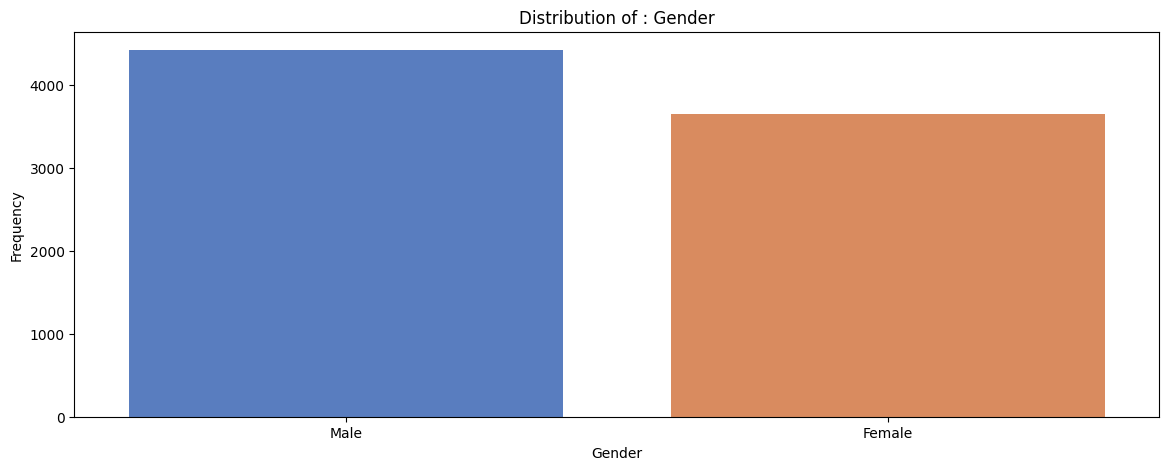

---------------------------------------------------------------------------------------------------------------------------
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


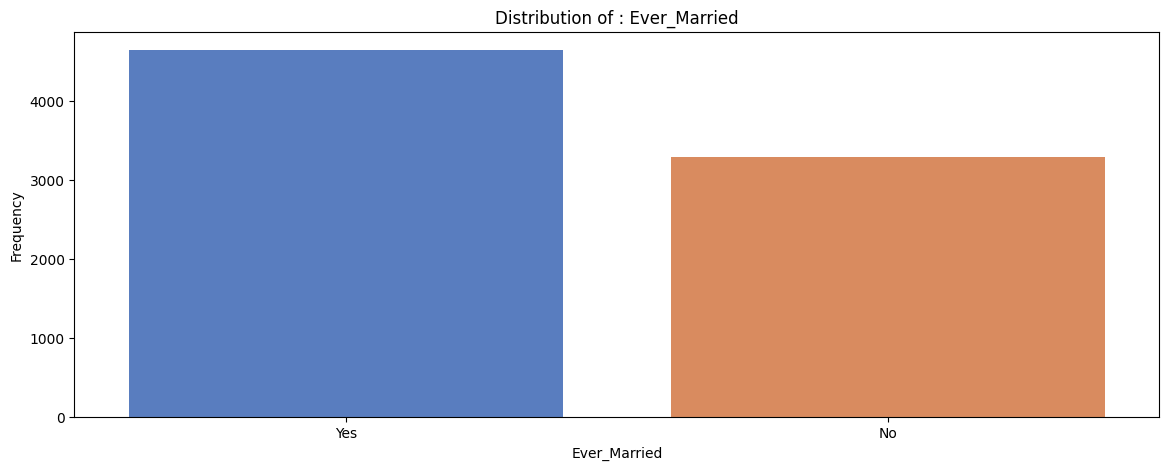

---------------------------------------------------------------------------------------------------------------------------
Age
35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: count, Length: 67, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


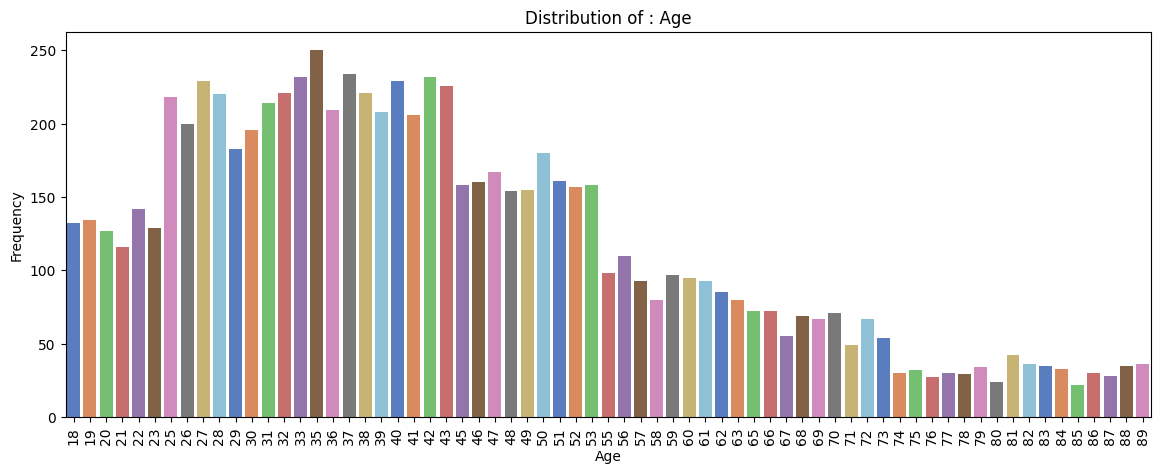

---------------------------------------------------------------------------------------------------------------------------
Graduated
Yes    4968
No     3022
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


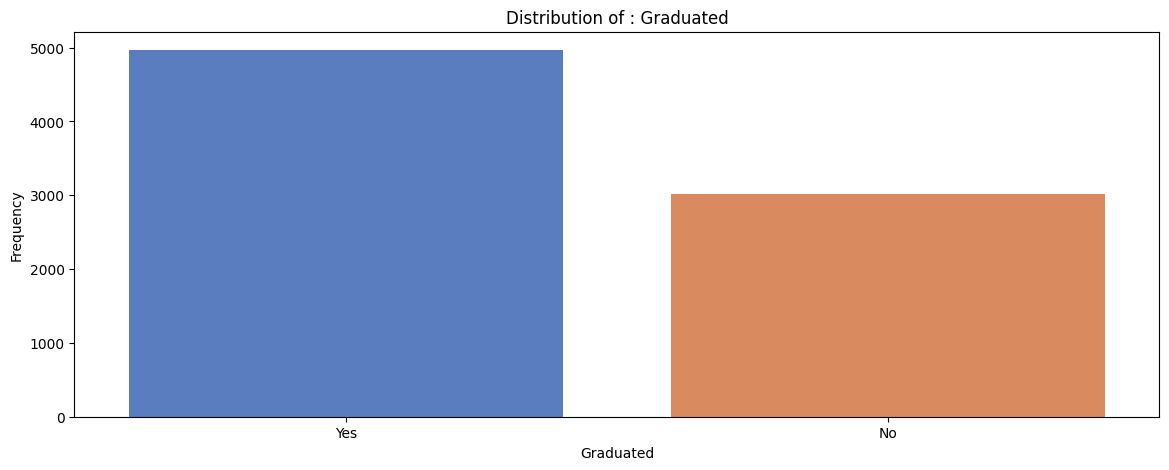

---------------------------------------------------------------------------------------------------------------------------
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


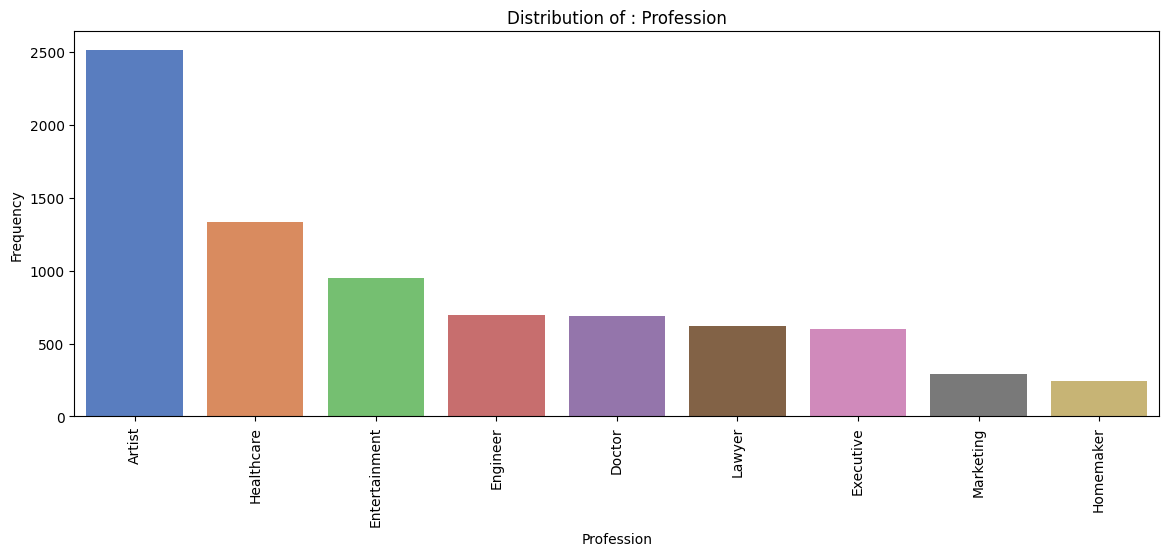

---------------------------------------------------------------------------------------------------------------------------
Work_Experience
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


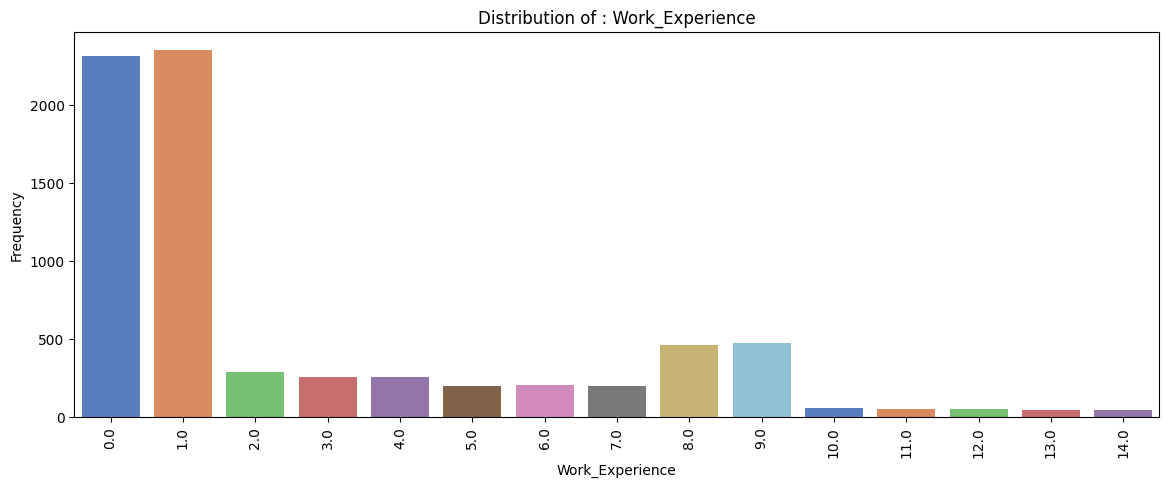

---------------------------------------------------------------------------------------------------------------------------
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


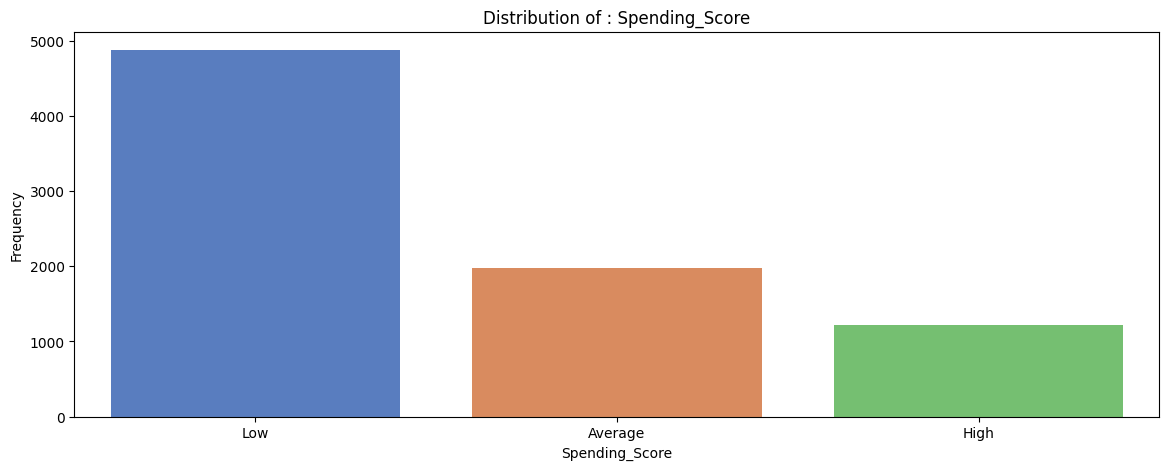

---------------------------------------------------------------------------------------------------------------------------
Family_Size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


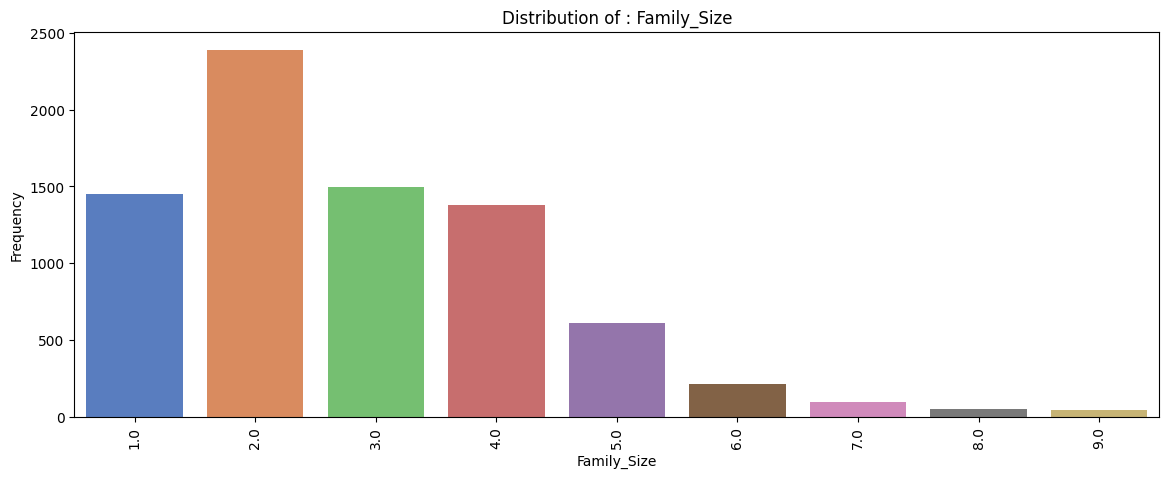

---------------------------------------------------------------------------------------------------------------------------
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


<ipython-input-10-d6fd94d9f02b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi


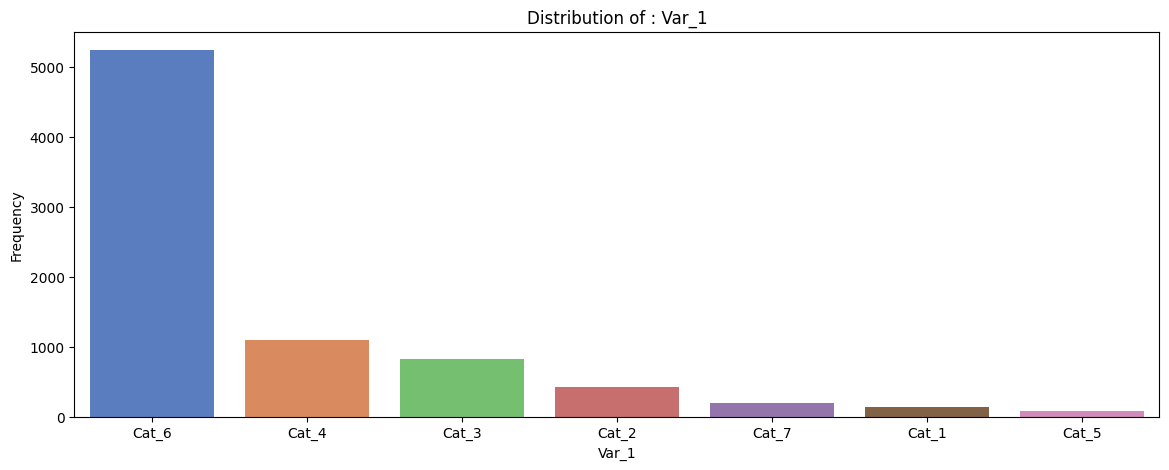

In [10]:

# Loop untuk semua kolom kecuali 'ID'
for col in df.columns:
    if col != 'ID':  # Skip kolom 'ID'
          # Display value counts
        print('---------------------------------------------------------------------------------------------------------------------------')
        print(df[col].value_counts())
        print('----------------------------------------------------------------------------------------------------------------------------')
        plt.figure(figsize=(14, 5))
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette='muted')  # Hitung distribusi
        plt.title('Distribution of : ' + col)  # Judul grafik
        if len(df[col].value_counts()) >= 9:  # Putar label jika kategori banyak
            plt.xticks(rotation=90)
        plt.ylabel('Frequency')
        plt.xlabel(col)
        plt.show()


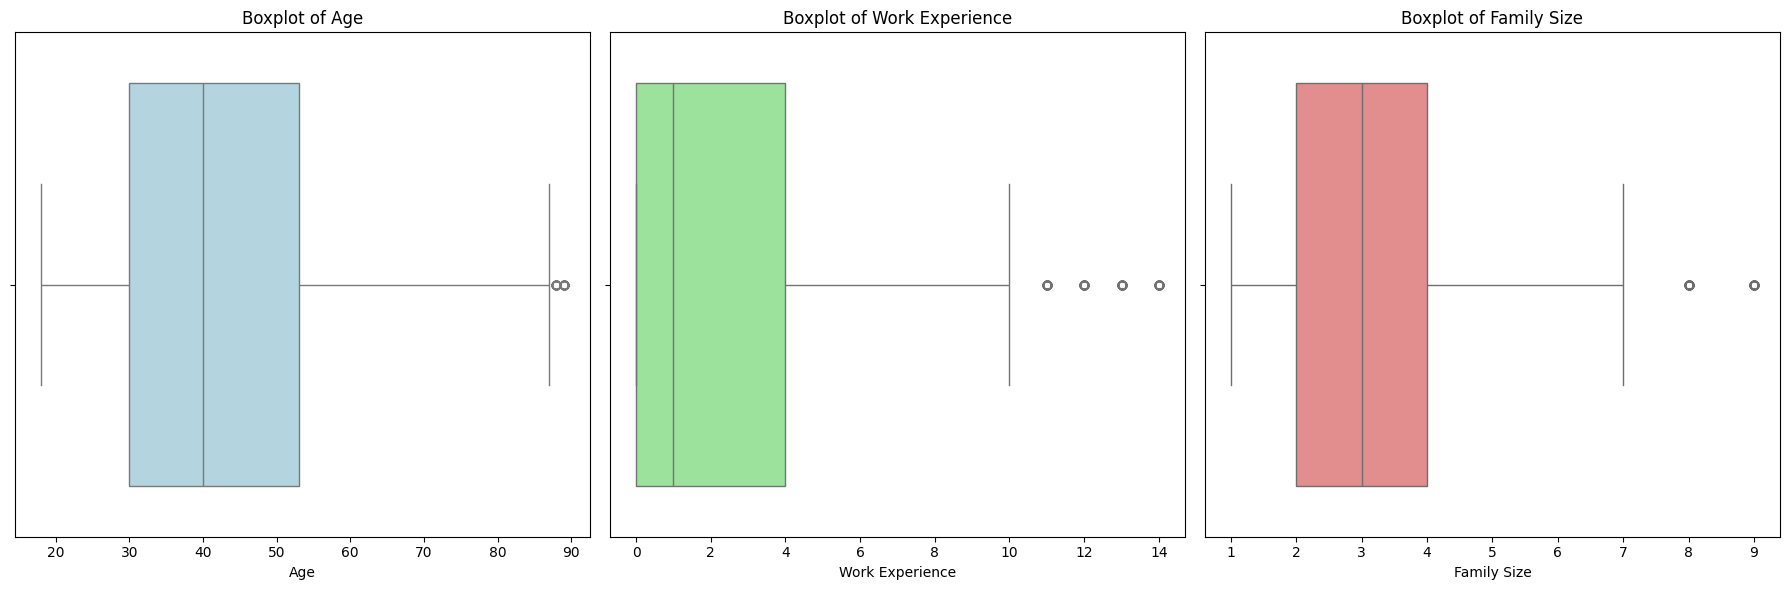

In [11]:
# Membuat boxplot untuk kolom 'Age', 'Work_Experience', dan 'Family_Size'
plt.figure(figsize=(18, 6))

# Boxplot untuk 'Age'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Boxplot untuk 'Work_Experience'
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Work_Experience'], color='lightgreen')
plt.title('Boxplot of Work Experience')
plt.xlabel('Work Experience')

# Boxplot untuk 'Family_Size'
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Family_Size'], color='lightcoral')
plt.title('Boxplot of Family Size')
plt.xlabel('Family Size')

# Menampilkan plot
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus baris dengan nilai outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [13]:
# Menghapus outlier pada kolom 'Age', 'Work_Experience', dan 'Family_Size'
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Work_Experience')
df = remove_outliers(df, 'Family_Size')


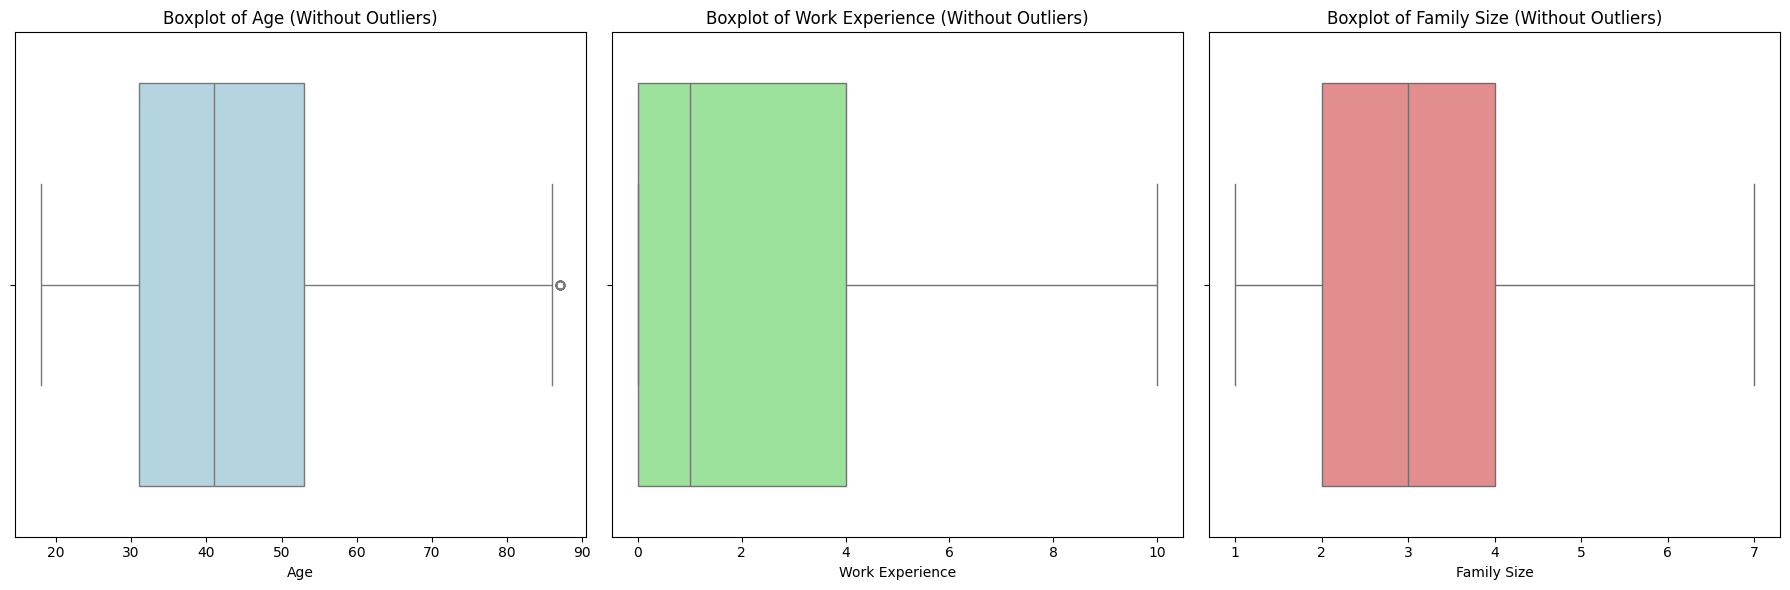

In [14]:
# Membuat boxplot untuk kolom 'Age', 'Work_Experience', dan 'Family_Size' setelah menghapus outlier
plt.figure(figsize=(18, 6))

# Boxplot untuk 'Age'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Boxplot of Age (Without Outliers)')
plt.xlabel('Age')

# Boxplot untuk 'Work_Experience'
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Work_Experience'], color='lightgreen')
plt.title('Boxplot of Work Experience (Without Outliers)')
plt.xlabel('Work Experience')

# Boxplot untuk 'Family_Size'
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Family_Size'], color='lightcoral')
plt.title('Boxplot of Family Size (Without Outliers)')
plt.xlabel('Family Size')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [15]:
data =df.copy()

In [16]:
data.drop(columns=['ID','Var_1'], inplace=True)

In [17]:
data.isna().sum()

,0
Gender,0
Ever_Married,102
Age,0
Graduated,57
Profession,89
Work_Experience,0
Spending_Score,0
Family_Size,0


In [18]:
# Menghapus baris dengan nilai kosong pada kolom Ever_Married
data = data.dropna(subset=['Ever_Married','Graduated'])

In [19]:
data.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,84
Work_Experience,0
Spending_Score,0
Family_Size,0


In [20]:
data.describe()

,Age,Work_Experience,Family_Size
count,6497.000000,6497.000000,6497.000000
mean,43.445898,2.371248,2.791134
std,16.137691,3.035772,1.403043
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,87.000000,10.000000,7.000000


In [21]:
data.duplicated().sum()

1119

In [22]:
data.dropna(subset=['Work_Experience','Profession'], inplace=True)

In [23]:
data.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0


In [24]:
data.dropna(inplace=True)

In [25]:
data.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0


In [26]:
data.duplicated().sum()

1117

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5296 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           5296 non-null   object 
 1   Ever_Married     5296 non-null   object 
 2   Age              5296 non-null   int64  
 3   Graduated        5296 non-null   object 
 4   Profession       5296 non-null   object 
 5   Work_Experience  5296 non-null   float64
 6   Spending_Score   5296 non-null   object 
 7   Family_Size      5296 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 372.4+ KB


In [29]:
data.nunique()

,0
Gender,2
Ever_Married,2
Age,65
Graduated,2
Profession,9
Work_Experience,11
Spending_Score,3
Family_Size,7


In [30]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
5,Male,Yes,56,No,Artist,0.0,Average,2.0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0


In [31]:
data_prepo = pd.get_dummies(data, columns=['Gender'], prefix='Gender')
data_prepo

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male
0,No,22,No,Healthcare,1.0,Low,4.0,False,True
2,Yes,67,Yes,Engineer,1.0,Low,1.0,True,False
3,Yes,67,Yes,Lawyer,0.0,High,2.0,False,True
5,Yes,56,No,Artist,0.0,Average,2.0,False,True
6,No,32,Yes,Healthcare,1.0,Low,3.0,False,True
...,...,...,...,...,...,...,...,...,...
8059,No,39,Yes,Healthcare,3.0,Low,2.0,False,True
8060,Yes,48,Yes,Artist,0.0,Average,6.0,True,False
8062,Yes,41,Yes,Artist,0.0,High,5.0,False,True
8064,No,35,No,Executive,3.0,Low,4.0,False,True


In [32]:
data_prepo['Gender_Female'] = data_prepo['Gender_Female'].astype(int)
data_prepo['Gender_Male'] = data_prepo['Gender_Male'].astype(int)
data_prepo

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male
0,No,22,No,Healthcare,1.0,Low,4.0,0,1
2,Yes,67,Yes,Engineer,1.0,Low,1.0,1,0
3,Yes,67,Yes,Lawyer,0.0,High,2.0,0,1
5,Yes,56,No,Artist,0.0,Average,2.0,0,1
6,No,32,Yes,Healthcare,1.0,Low,3.0,0,1
...,...,...,...,...,...,...,...,...,...
8059,No,39,Yes,Healthcare,3.0,Low,2.0,0,1
8060,Yes,48,Yes,Artist,0.0,Average,6.0,1,0
8062,Yes,41,Yes,Artist,0.0,High,5.0,0,1
8064,No,35,No,Executive,3.0,Low,4.0,0,1


In [33]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kolom 'Ever_Married' dan 'Graduated' menjadi integer
data_prepo['Ever_Married'] = label_encoder.fit_transform(data_prepo['Ever_Married'])
data_prepo['Graduated'] = label_encoder.fit_transform(data_prepo['Graduated'])
data_prepo['Spending_Score'] = label_encoder.fit_transform(data_prepo['Spending_Score'])
data_prepo['Profession'] = label_encoder.fit_transform(data_prepo['Profession'])
data_prepo

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male
0,0,22,0,5,1.0,2,4.0,0,1
2,1,67,1,2,1.0,2,1.0,1,0
3,1,67,1,7,0.0,1,2.0,0,1
5,1,56,0,0,0.0,0,2.0,0,1
6,0,32,1,5,1.0,2,3.0,0,1
...,...,...,...,...,...,...,...,...,...
8059,0,39,1,5,3.0,2,2.0,0,1
8060,1,48,1,0,0.0,0,6.0,1,0
8062,1,41,1,0,0.0,1,5.0,0,1
8064,0,35,0,4,3.0,2,4.0,0,1


In [34]:
data_prepo['Family_Size'] = pd.to_numeric(data_prepo['Family_Size'], errors='coerce')
data_prepo

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male
0,0,22,0,5,1.0,2,4.0,0,1
2,1,67,1,2,1.0,2,1.0,1,0
3,1,67,1,7,0.0,1,2.0,0,1
5,1,56,0,0,0.0,0,2.0,0,1
6,0,32,1,5,1.0,2,3.0,0,1
...,...,...,...,...,...,...,...,...,...
8059,0,39,1,5,3.0,2,2.0,0,1
8060,1,48,1,0,0.0,0,6.0,1,0
8062,1,41,1,0,0.0,1,5.0,0,1
8064,0,35,0,4,3.0,2,4.0,0,1


In [35]:
data_prepo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5296 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ever_Married     5296 non-null   int64  
 1   Age              5296 non-null   int64  
 2   Graduated        5296 non-null   int64  
 3   Profession       5296 non-null   int64  
 4   Work_Experience  5296 non-null   float64
 5   Spending_Score   5296 non-null   int64  
 6   Family_Size      5296 non-null   float64
 7   Gender_Female    5296 non-null   int64  
 8   Gender_Male      5296 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 413.8 KB


In [36]:
data_prepo.describe()

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male
count,5296.000000,5296.000000,5296.000000,5296.000000,5296.000000,5296.000000,5296.000000,5296.000000,5296.000000
mean,0.615370,43.846110,0.638029,2.662764,2.610838,1.343656,2.809668,0.453550,0.546450
std,0.486554,15.795623,0.480616,2.480279,3.136279,0.852984,1.432797,0.497885,0.497885
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,1.000000,53.000000,1.000000,5.000000,5.000000,2.000000,4.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,8.000000,10.000000,2.000000,7.000000,1.000000,1.000000


Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

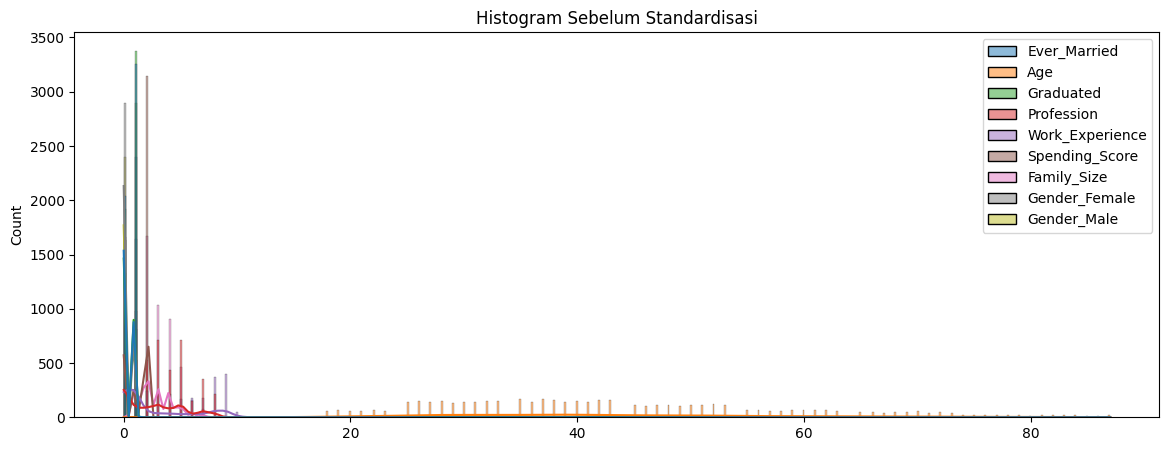

In [37]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(14, 5))
# plt.subplot(1, 2, 1)
sns.histplot(data_prepo, kde=True)
plt.title("Histogram Sebelum Standardisasi")

In [38]:
# from sklearn.preprocessing import StandardScaler

# standardscaler = StandardScaler()
# scaled_data = standardscaler.fit_transform(data_prepo)
# scaled_data

In [39]:
# plt.figure(figsize=(14, 5))
# # plt.subplot(1, 2, 1)
# sns.histplot(scaled_data, kde=True)
# plt.title("Histogram Standardisasi")

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [40]:
from sklearn.cluster import KMeans

# scaled_data = scaled_data[~np.isnan(scaled_data).any(axis=1)]

# Lanjutkan dengan KMeans pada data yang sudah bersih
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_prepo)
    inertia.append(kmeans.inertia_)

print(inertia)

[1425592.6631419954, 514336.4687672494, 293604.03030435415, 204906.47974157447, 168346.83414995213, 147371.9066910952, 129382.10079270888, 123464.38083468839, 102054.57167587998, 98486.79618984893]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

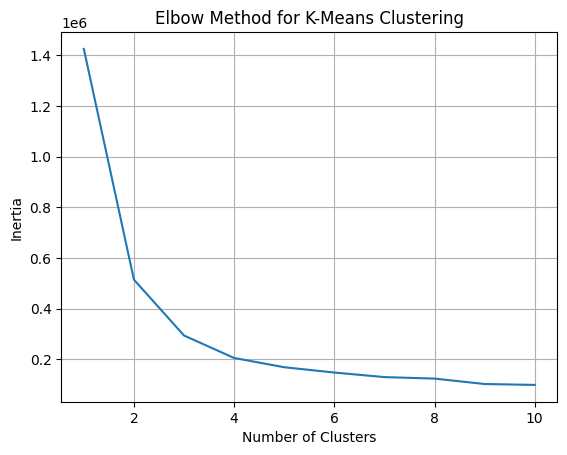

In [41]:
sns.lineplot(x=range(1, 11), y=inertia, markers='o')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')
plt.grid(True)
plt.show()

In [42]:
data_prepo.isna().sum()

,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Gender_Female,0
Gender_Male,0


In [43]:
data_prepo.dropna(inplace= True)

In [44]:
kmean = KMeans(n_clusters=2, random_state=42)  # Tentukan jumlah cluster
kmean.fit(data_prepo)

# Menyimpan label cluster ke dalam DataFrame 'segmented_data'
segmented_data = data_prepo.copy()  # Membuat salinan dari data asli
segmented_data['cluster'] = kmean.labels_

segmented_data

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,cluster
0,0,22,0,5,1.0,2,4.0,0,1,0
2,1,67,1,2,1.0,2,1.0,1,0,1
3,1,67,1,7,0.0,1,2.0,0,1,1
5,1,56,0,0,0.0,0,2.0,0,1,1
6,0,32,1,5,1.0,2,3.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8059,0,39,1,5,3.0,2,2.0,0,1,0
8060,1,48,1,0,0.0,0,6.0,1,0,1
8062,1,41,1,0,0.0,1,5.0,0,1,0
8064,0,35,0,4,3.0,2,4.0,0,1,0


In [45]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk mengukur kualitas clustering
sil_score = silhouette_score(data_prepo, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.3211968679784185


In [46]:
segmented_data_ori = data.copy()  # Membuat salinan dari data asli
segmented_data_ori['cluster'] = kmean.labels_

segmented_data_ori

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1
5,Male,Yes,56,No,Artist,0.0,Average,2.0,1
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0
...,...,...,...,...,...,...,...,...,...
8059,Male,No,39,Yes,Healthcare,3.0,Low,2.0,0
8060,Female,Yes,48,Yes,Artist,0.0,Average,6.0,1
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,0
8064,Male,No,35,No,Executive,3.0,Low,4.0,0


In [47]:
segmented_data['cluster'].value_counts()

,count
cluster,
0,3274
1,2022


In [48]:
sample_per_cluster = segmented_data_ori.groupby('cluster').head()
sample_per_cluster

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1
5,Male,Yes,56,No,Artist,0.0,Average,2.0,1
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0
7,Female,No,33,Yes,Healthcare,1.0,Low,3.0,0
8,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,1
9,Female,Yes,55,Yes,Artist,1.0,Average,4.0,1
10,Female,No,26,Yes,Engineer,1.0,Low,3.0,0
11,Male,No,19,No,Healthcare,4.0,Low,4.0,0


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [49]:
from sklearn.ensemble import RandomForestClassifier

X = segmented_data.drop(columns=['cluster'])

# Membuat model Random Forest untuk menilai pentingnya fitur
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, X)  # Fit model ke data tanpa target (karena clustering tidak memiliki target label eksplisit)

# Menampilkan pentingnya fitur
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


           Feature  Importance
1              Age    0.170909
6      Family_Size    0.134122
4  Work_Experience    0.131508
3       Profession    0.130433
7    Gender_Female    0.094828
5   Spending_Score    0.094806
0     Ever_Married    0.085893
2        Graduated    0.080018
8      Gender_Male    0.077482


In [50]:
# Menghapus kolom dengan nilai pentingnya fitur rendah
columns_to_drop = ['Gender_Female', 'Ever_Married', 'Graduated', 'Gender_Male']
X_dropped = X.drop(columns=columns_to_drop)

# Menampilkan data setelah kolom dihapus
X_dropped.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size
0,22,5,1.0,2,4.0
2,67,2,1.0,2,1.0
3,67,7,0.0,1,2.0
5,56,0,0.0,0,2.0
6,32,5,1.0,2,3.0


In [51]:
# Menghapus kolom dengan nilai pentingnya fitur rendah
columns_to_drop = ['Ever_Married', 'Graduated', 'Gender','Spending_Score']
segmented_data_ori = segmented_data_ori.drop(columns=columns_to_drop)

# Menampilkan data setelah kolom dihapus
segmented_data_ori.head()

,Age,Profession,Work_Experience,Family_Size,cluster
0,22,Healthcare,1.0,4.0,0
2,67,Engineer,1.0,1.0,1
3,67,Lawyer,0.0,2.0,1
5,56,Artist,0.0,2.0,1
6,32,Healthcare,1.0,3.0,0


In [52]:
sample_per_cluster = segmented_data_ori.groupby('cluster').head()
sample_per_cluster

,Age,Profession,Work_Experience,Family_Size,cluster
0,22,Healthcare,1.0,4.0,0
2,67,Engineer,1.0,1.0,1
3,67,Lawyer,0.0,2.0,1
5,56,Artist,0.0,2.0,1
6,32,Healthcare,1.0,3.0,0
7,33,Healthcare,1.0,3.0,0
8,61,Engineer,0.0,3.0,1
9,55,Artist,1.0,4.0,1
10,26,Engineer,1.0,3.0,0
11,19,Healthcare,4.0,4.0,0


In [53]:
from sklearn.cluster import KMeans

# Tentukan jumlah cluster yang optimal (misalnya 3 cluster)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_dropped)

# Menyimpan hasil clustering ke dalam DataFrame
segmented_data = X_dropped.copy()  # Menggunakan X_dropped karena kolom yang dihapus sudah disesuaikan
segmented_data['cluster'] = kmeans.labels_

# Menampilkan beberapa baris data yang telah dikelompokkan
segmented_data.head()


,Age,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,22,5,1.0,2,4.0,0
2,67,2,1.0,2,1.0,1
3,67,7,0.0,1,2.0,1
5,56,0,0.0,0,2.0,1
6,32,5,1.0,2,3.0,0


In [54]:
segmented_data['cluster'].value_counts()

,count
cluster,
0,3276
1,2020


In [55]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk mengukur kualitas clustering
sil_score = silhouette_score(X_dropped, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5300209989586622


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

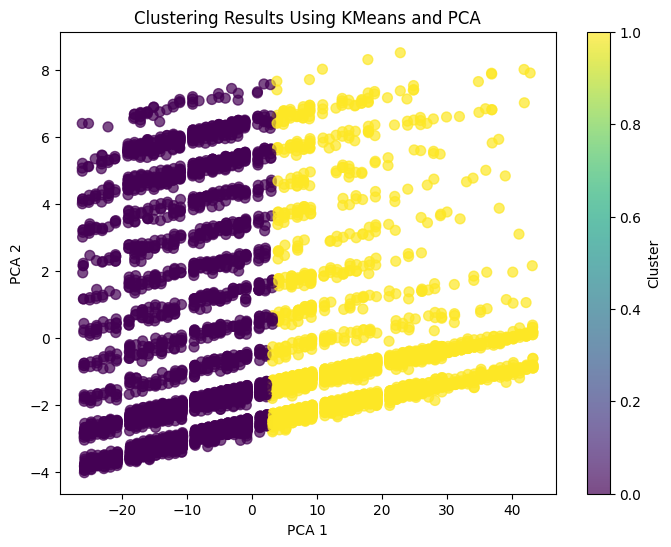

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Lakukan PCA untuk mereduksi data ke 2 dimensi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_dropped)

# Tambahkan hasil PCA ke dalam DataFrame untuk visualisasi
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Menambahkan label cluster ke DataFrame PCA untuk pewarnaan
pca_df['cluster'] = kmean.labels_

# Visualisasi menggunakan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clustering Results Using KMeans and PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Descriptive Statistics per Cluster:
               Age                    Work_Experience                       \
              mean        std min max            mean       std  min   max   
cluster                                                                      
0        33.565629   7.506107  18  47        3.180708  3.364249  0.0  10.0   
1        60.518812  10.646285  47  87        1.686634  2.460851  0.0  10.0   

        Family_Size                      
               mean       std  min  max  
cluster                                  
0          2.963675  1.475570  1.0  7.0  
1          2.559901  1.323344  1.0  7.0  

Profession Distribution per Cluster:


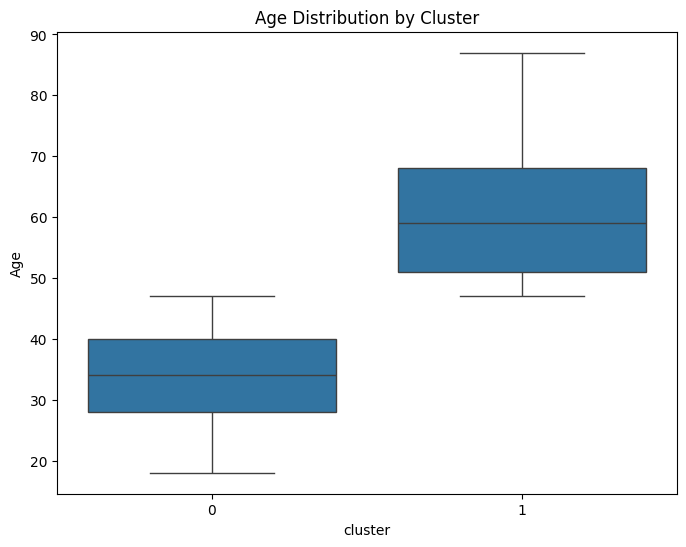

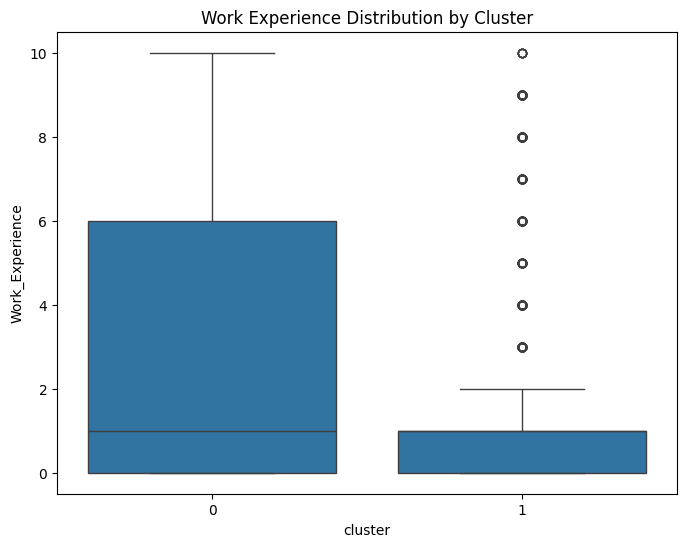

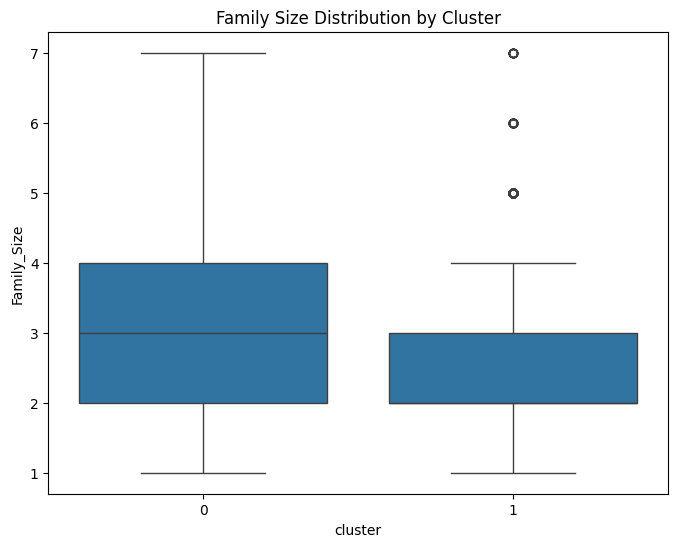

In [57]:
# Analisis deskriptif untuk fitur numerik berdasarkan cluster
cluster_analysis = segmented_data.groupby('cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Work_Experience': ['mean', 'std', 'min', 'max'],
    'Family_Size': ['mean', 'std', 'min', 'max']
})

print("Descriptive Statistics per Cluster:")
print(cluster_analysis)

# Distribusi profesi berdasarkan cluster
profession_distribution = segmented_data.groupby('cluster')['Profession'].value_counts(normalize=True).unstack()

print("\nProfession Distribution per Cluster:")
profession_distribution

# Visualisasi boxplot untuk numerik berdasarkan cluster
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=segmented_data, x='cluster', y='Age')
plt.title('Age Distribution by Cluster')
plt.show()

# Boxplot untuk Work_Experience
plt.figure(figsize=(8, 6))
sns.boxplot(data=segmented_data, x='cluster', y='Work_Experience')
plt.title('Work Experience Distribution by Cluster')
plt.show()

# Boxplot untuk Family_Size
plt.figure(figsize=(8, 6))
sns.boxplot(data=segmented_data, x='cluster', y='Family_Size')
plt.title('Family Size Distribution by Cluster')
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0:

- Pelanggan dengan usia lebih muda dan pengalaman kerja rendah.
- Sebagian besar memiliki ukuran keluarga lebih besar.
- Pengeluaran pelanggan cenderung rendah hingga sedang, menunjukkan potensi untuk kendaraan yang terjangkau dan efisien.
- Cocok untuk produk seperti P1 atau P2, yang lebih hemat bahan bakar dan sesuai kebutuhan dasar.

2. Cluster 1:

- Pelanggan dengan usia lebih matang dan pengalaman kerja lebih tinggi.
- Sebagian besar memiliki ukuran keluarga kecil hingga sedang.
- Cenderung memiliki pengeluaran yang lebih tinggi, mengindikasikan stabilitas finansial.
- Segmen ini lebih cocok untuk produk premium seperti P3, P4, atau P5, yang menawarkan kenyamanan dan fitur teknologi.


**Kesimpulan**

Dengan hanya dua cluster, perusahaan otomotif dapat menyederhanakan strategi pemasaran dan pengambilan keputusan. Kedua segmen pelanggan mencerminkan kebutuhan utama di pasar otomotif:

1. Efisiensi untuk pelanggan muda atau keluarga besar.
2. Kenyamanan dan teknologi untuk pelanggan mapan.

Strategi ini dapat memaksimalkan penetrasi pasar dan meningkatkan efektivitas kampanye pemasaran.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [59]:
segmented_data.to_csv('segmented_data.csv', index=False)